# Extensive Algorithm comparison for SNR = X
This notebook contains the algorithm comparison for the measurements done with the following parameters (specifically):

# SNR = X
noise amp grc = 10m gaussian
# N_FRAMES =  comparison is based on different aspects, such as:
* Dataset lenght
* complexity: different for each algorithm, made by playing around with the parameters that it has available
* Pre- and post- feature scaling

Please refer to the other notebooks to see the results of the comparison for different measurement parameters.


In [2]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%autoreload 2

In [4]:
import setup_dataset

In [37]:
data, labels = setup_dataset.setup_iterables("with_dc")

Error trying to access path:  [Errno 2] No such file or directory: '../../data/feature_extraction/with_dc/interframe_time_ch_1_scn_0.dat'


FileNotFoundError: [Errno 2] No such file or directory: '../../data/feature_extraction/with_dc/interframe_time_ch_1_scn_0.dat'

In [ ]:
print(len(data))
print(data[1])
print(labels[1])
print(len([x for x in labels_test if x==1]))
mul = 0
for i in data[4500*mul:(4500*mul)+20]:
    print(i)

In [16]:
data_test, labels_test = setup_dataset.setup_simple_iterables("with_dc/")

6
106890
106890


In [17]:
print(len(data_test))
print(data_test[1])
print(len(labels_test))
print(len([x for x in labels_test if x==3]))
for i in data_test[:20]:
    print(i)

106890
[-0.33842385, -1.0, -0.21760277, 0.94721216, 38296.078, 0.13933764]
106890
3990
[-0.35840458, -1.0, -0.27307013, 0.35840458, 69753.578, 0.12860252]
[-0.33842385, -1.0, -0.21760277, 0.94721216, 38296.078, 0.13933764]
[-0.31619865, -0.25600332, -0.18880241, 1.56162, 26041.332, 0.1513679]
[-0.29711893, -0.076801002, -0.14791299, 2.1760278, 19728.283, 0.16024581]
[-0.28617507, -0.076801002, -0.071680903, 0.39680511, 14575.372, 0.23044625]
[-0.27047303, 0.17066884, -0.069819063, 0.23466973, 10911.173, 0.26534209]
[-0.097011767, 0.17554514, 0.010666847, 0.19200242, 9389.9043, 0.45273623]
[-0.0051200548, 0.17554514, 0.32548985, 0.91905177, 3792.4272, 1.4020648]
[0.17152219, 544.49976, 190.2225, 180.16812, 11.467171, 593290.44]
[0.56320721, 1215.33, 688.03442, 962.16278, 3.6315393, 3856537.8]
[-0.35556009, 0.153602, 0.153602, -0.2816036, 97654.992, 0.12880205]
[-0.35340941, -0.2432031, -0.30720392, -0.29440376, 81379.172, 0.12898728]
[-0.34897289, -0.25600323, -0.26880342, -0.29867044, 

In [18]:
data, labels = setup_dataset.setup_simple_iterables("with_dc")

6
106890
106890


In [19]:
X_train, X_test, y_train, y_test = setup_dataset.slice_data(data, labels)

In [20]:
# Setting up various complexities for the different algorithms.
# Number of neighbors
knn_c = (2, 4, 10, 50)
# Maximum depth in a decision tree
dtc_c = (2, 5, 10, 50)
# complexities for the rbf kernel
svc_c = (1, 1000, 1000000)
# Number of estimators in the random forest classifier
rfc_c = (1, 10, 100, 1000, 10000, 100000)
# Number of parallel jobs (CPU)
rfc_jobs = (3, -2)
gpc_jobs = (3, -2)
# Number of iteration in the Gaussian Process Classifier
gpc_c = (20, 50, 100)

In [21]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
X_train_scaled, X_test_scaled = setup_dataset.scale_sliced_data(X_train, X_test, StandardScaler())

In [22]:
knn_accs, knn_pred, knn_pred_times, knn_fit_times = \
setup_dataset.run_knn(X_train, X_test, y_train, y_test, knn_c)

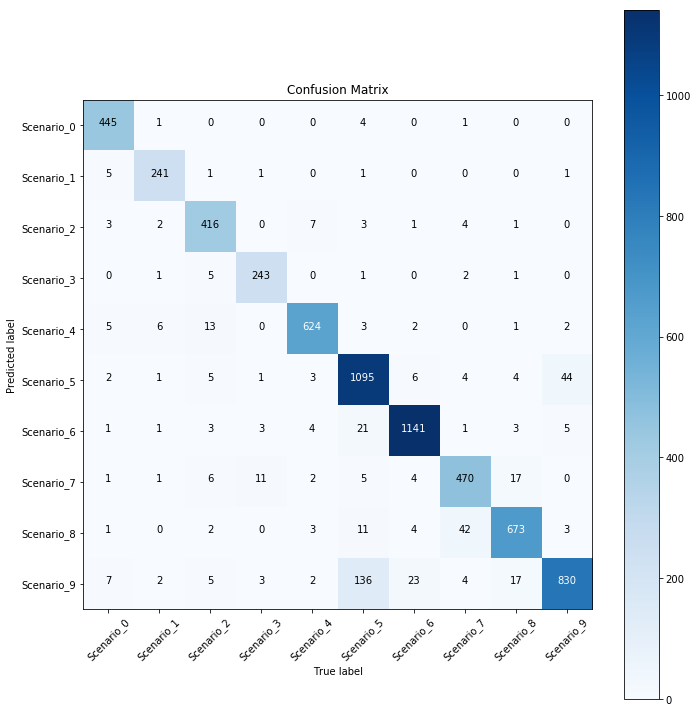

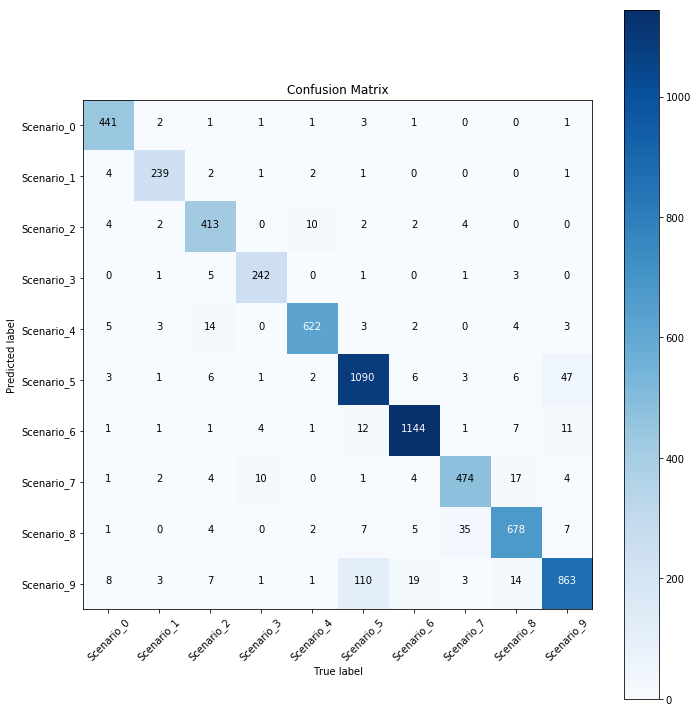

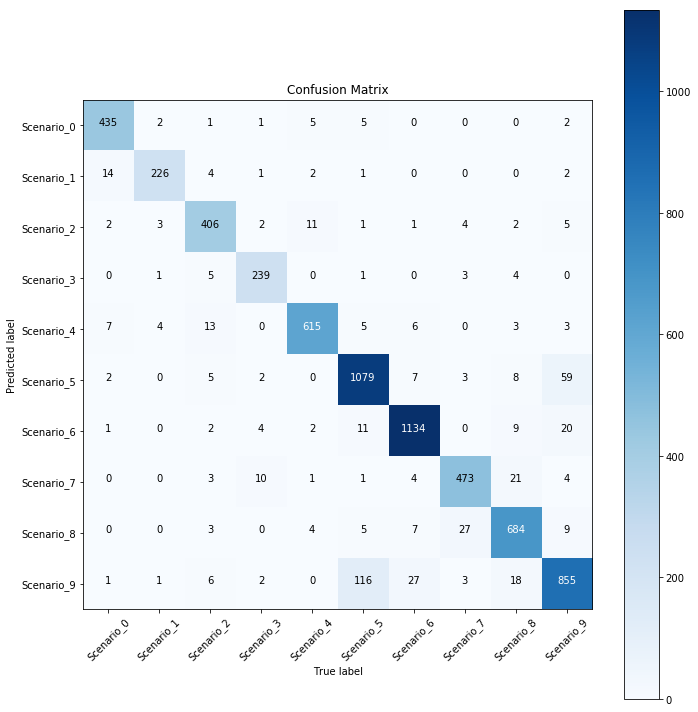

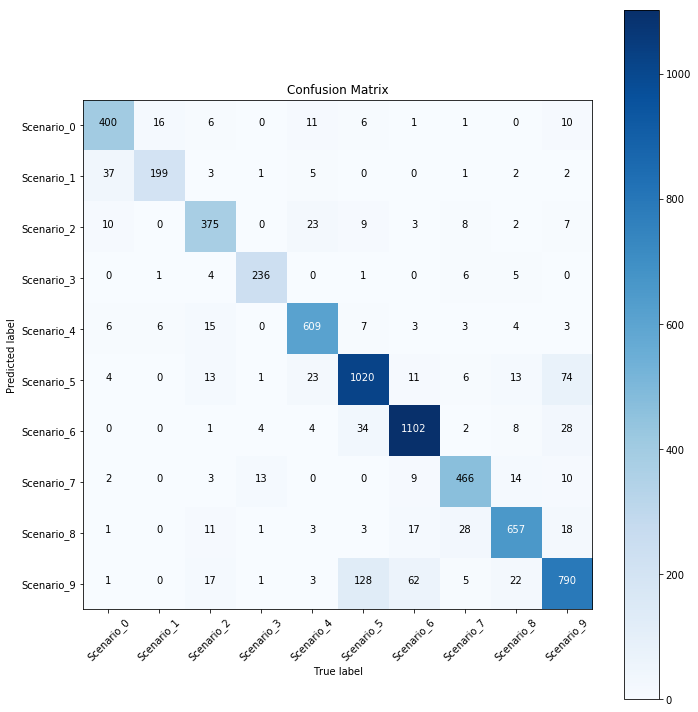

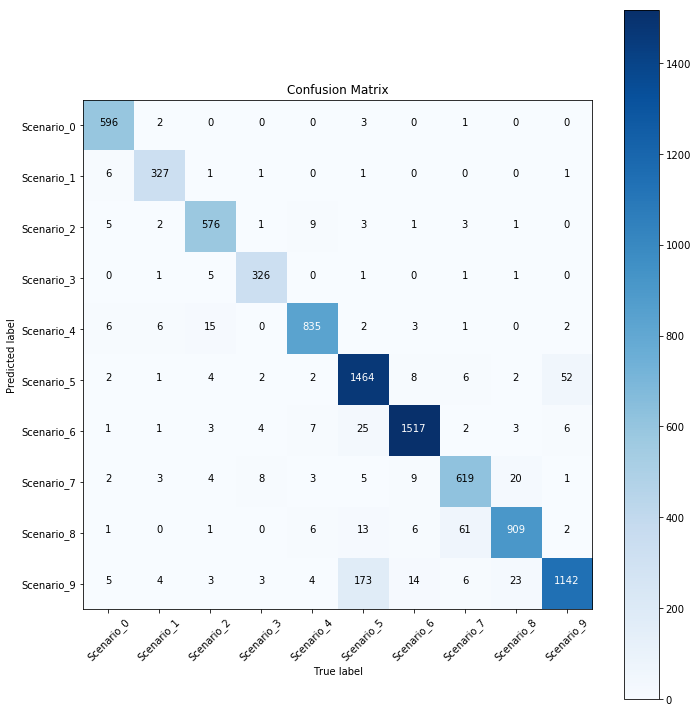

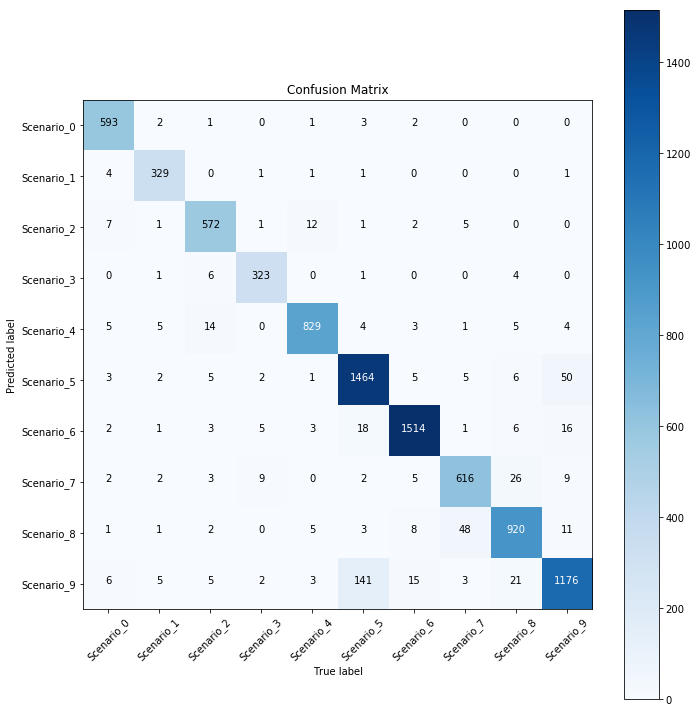

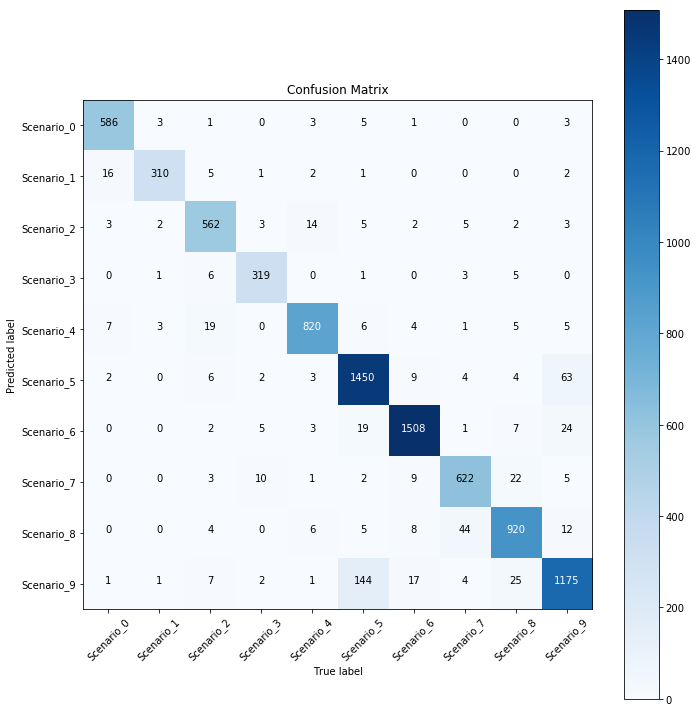

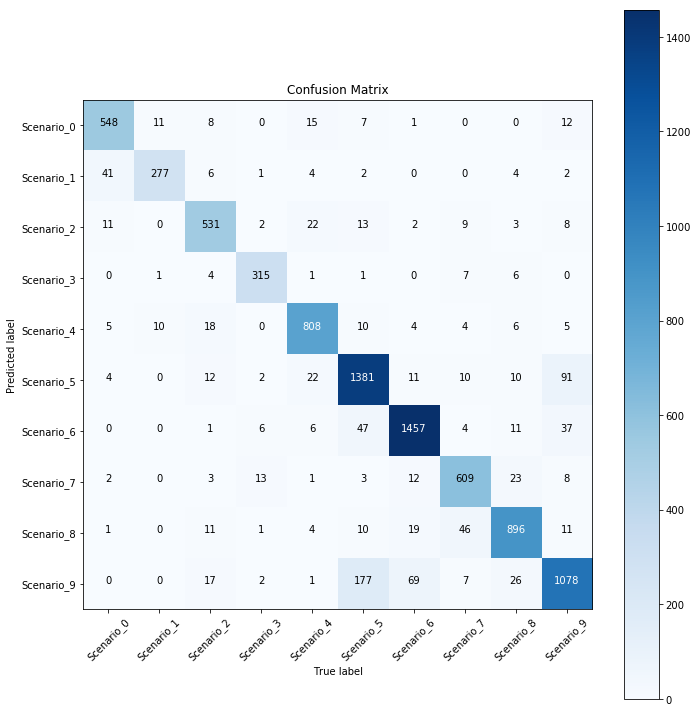

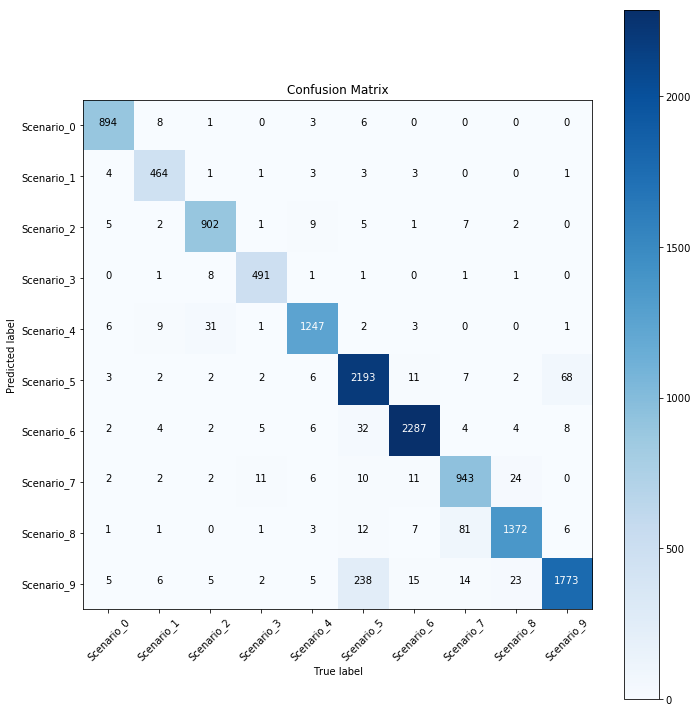

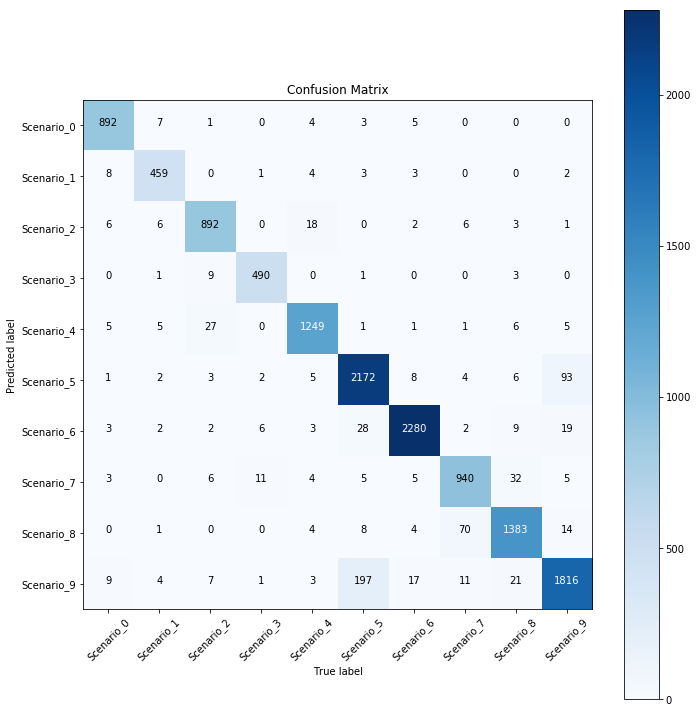

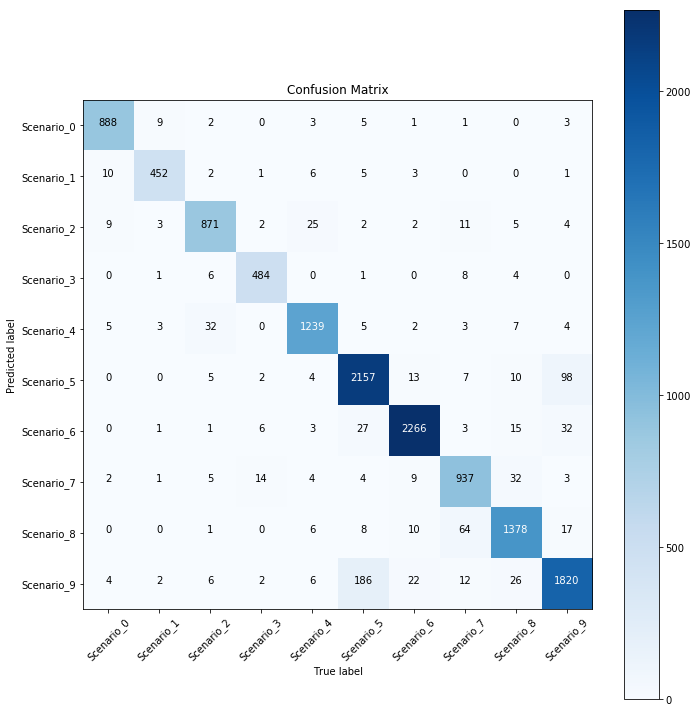

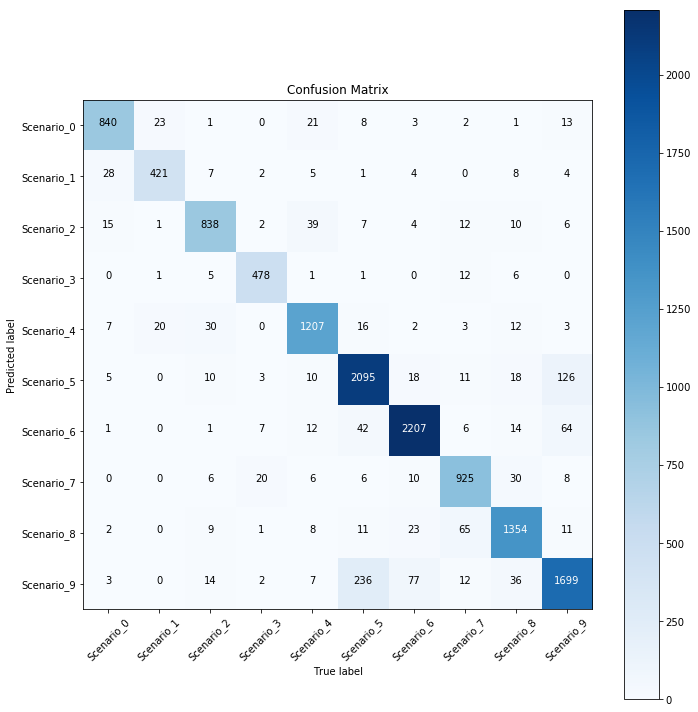

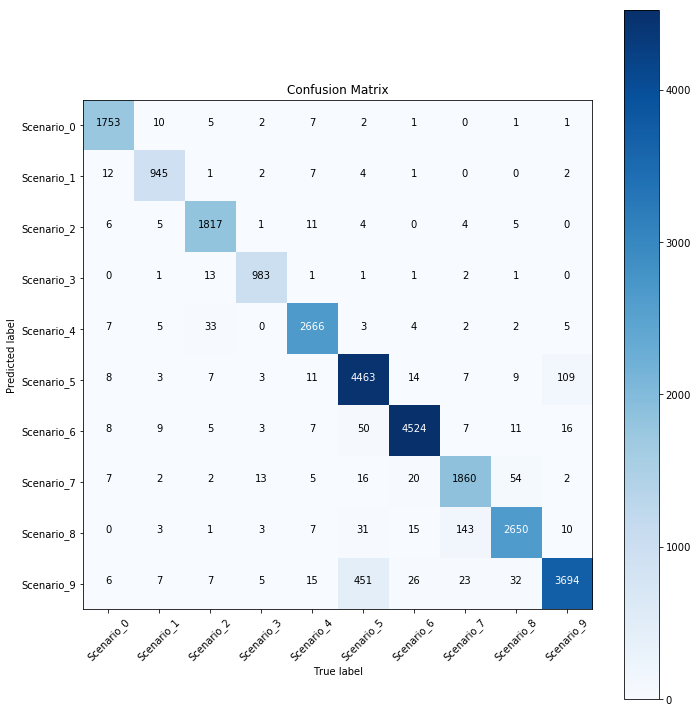

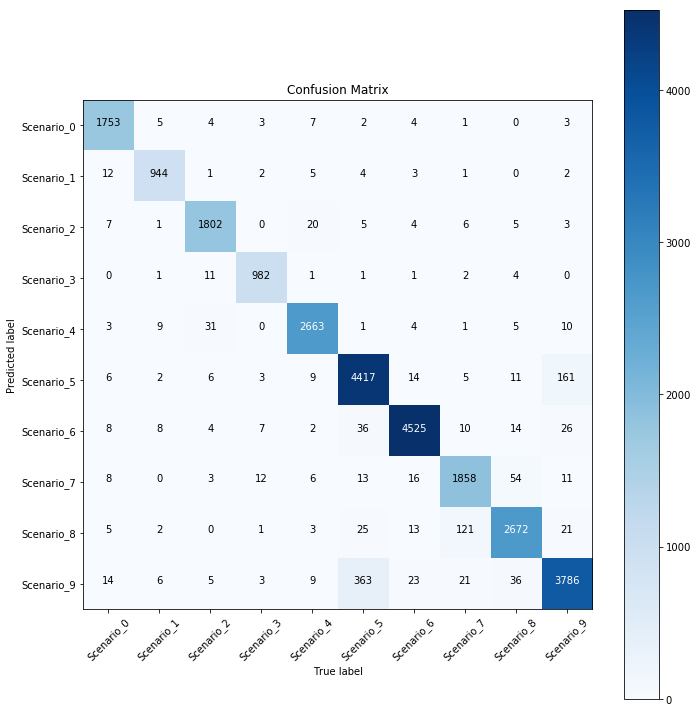

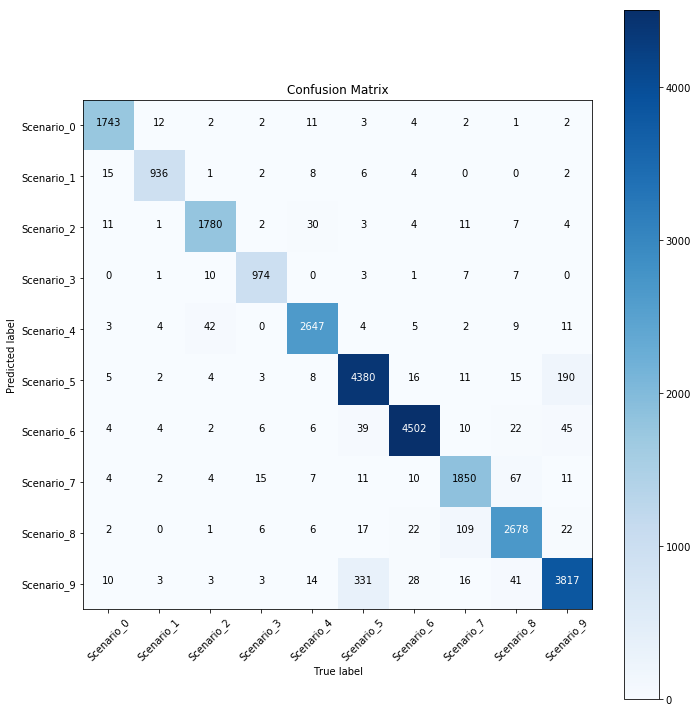

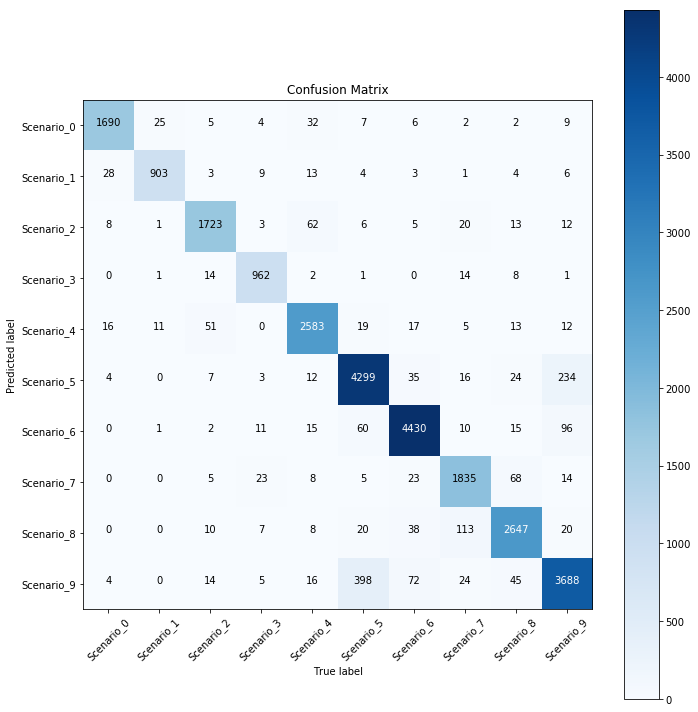

In [23]:
setup_dataset.compute_cm(y_test, knn_pred, knn_c)

In [24]:
knn_accs_scaled, knn_pred_scaled, knn_pred_times_scaled, knn_fit_times_scaled =\
setup_dataset.run_knn(X_train_scaled, X_test_scaled, y_train, y_test, knn_c)

In [ ]:
setup_dataset.compute_cm(y_test, knn_pred_scaled, knn_c)

In [25]:
for line in knn_accs :
    print(line)
print("====================") 
for line in knn_accs_scaled:
    print(line)

[0.92485029940119756, 0.92904191616766463, 0.92005988023952101, 0.87634730538922156]
[0.93308633658919948, 0.93589311777253847, 0.92870775794319071, 0.88694285393510719]
[0.94049846568370632, 0.94102237856447868, 0.93495995808696952, 0.90292642766260012]
[0.94880814279833847, 0.95056692736593951, 0.94701193728249078, 0.92654267859147554]
[0.91032934131736531, 0.91107784431137728, 0.89880239520958083, 0.85973053892215567]
[0.91197934209049059, 0.91557202200516452, 0.90692713596048047, 0.8723475917817447]
[0.91767083302148045, 0.92103884439787442, 0.91819474590225281, 0.88945438215702421]
[0.92669236238446284, 0.93050929910563929, 0.92639299479848825, 0.90742057403734611]


In [ ]:
dtc_accs, dtc_pred, dtc_pred_times, dtc_fit_times = \
setup_dataset.run_decision_tree(X_train, X_test, y_train, y_test, dtc_c)

In [ ]:
dtc_accs, dtc_pred, dtc_pred_times, dtc_fit_times = \
setup_dataset.run_decision_tree(X_train, X_test, y_train, y_test, dtc_c)

In [ ]:
dtc_accs_scaled, dtc_pred_scaled, dtc_pred_times_scaled, dtc_fit_times_scaled = \
setup_dataset.run_decision_tree(X_train_scaled, X_test_scaled, y_train, y_test, dtc_c)

In [ ]:
setup_dataset.compute_cm(y_test, dtc_pred, dtc_c)

In [ ]:
setup_dataset.compute_cm(y_test, dtc_pred_scaled, dtc_c)

In [ ]:
nbc_accs, nbc_pred, nbc_pred_times, nbc_fit_times = \
setup_dataset.run_naive_bayes(X_train, X_test, y_train, y_test, (1,))

In [ ]:
nbc_accs_scaled, nbc_pred_scaled, nbc_pred_times_scaled, nbc_fit_times_scaled = \
setup_dataset.run_naive_bayes(X_train_scaled, X_test_scaled, y_train, y_test, (1,))

In [ ]:
setup_dataset.compute_cm(y_test, nbc_pred, [1])

In [ ]:
setup_dataset.compute_cm(y_test, nbc_pred_scaled, [1])

In [ ]:
abc_accs, abc_pred, abc_pred_times, abc_fit_times = \
setup_dataset.run_adaboost(X_train, X_test, y_train, y_test, (1,))

In [ ]:
abc_accs_scaled, abc_pred_scaled, abc_pred_times_scaled, abc_fit_times_scaled = \
setup_dataset.run_adaboost(X_train_scaled, X_test_scaled, y_train, y_test, (1,))

In [ ]:
setup_dataset.compute_cm(y_test, abc_pred, [1])

In [ ]:
setup_dataset.compute_cm(y_test, abc_pred_scaled, [1])

In [ ]:
qda_accs, qda_pred, qda_pred_times, qda_fit_times = \
setup_dataset.run_quadratic(X_train, X_test, y_train, y_test, (1,))

In [ ]:
qda_accs_scaled, qda_pred_scaled, qda_pred_times_scaled, qda_fit_times_scaled = \
setup_dataset.run_quadratic(X_train_scaled, X_test_scaled, y_train, y_test, (1,))

In [ ]:
setup_dataset.compute_cm(y_test, qda_pred, [1])

In [ ]:
setup_dataset.compute_cm(y_test, qda_pred_scaled, [1])

In [ ]:
dtc_accs, dtc_pred, dtc_pred_times, dtc_fit_times = \
setup_dataset.run_decision_tree(X_train, X_test, y_train, y_test, dtc_c)

In [ ]:
dtc_accs_scaled, dtc_pred_scaled, dtc_pred_times_scaled, dtc_fit_times_scaled = \
setup_dataset.run_decision_tree(X_train_scaled, X_test_scaled, y_train, y_test, dtc_c)

In [ ]:
setup_dataset.compute_cm(y_test, dtc_pred, dtc_c)

In [ ]:
setup_dataset.compute_cm(y_test, dtc_pred_scaled, dtc_c)

In [ ]:
svc_accs, svc_pred, svc_pred_times, svc_fit_times = \
setup_dataset.run_svc(X_train, X_test, y_train, y_test, svc_c)

In [ ]:
svc_accs_scaled, svc_pred_scaled, svc_pred_times_scaled, svc_fit_times_scaled = \
setup_dataset.run_svc(X_train_scaled, X_test_scaled, y_train, y_test, svc_c)

In [ ]:
setup_dataset.compute_cm(y_test, svc_pred, svc_c)

In [ ]:
setup_dataset.compute_cm(y_test, svc_pred_scaled, svc_c)

In [ ]:
for line in svc_accs :
    print(line)
print("====================") 
for line in svc_accs_scaled:
    print(line)

In [ ]:
# THIS MAKES THE KERNEL CRASH!
rfc_accs, rfc_pred, rfc_pred_times, rfc_fit_times = \
setup_dataset.run_random_forest(X_train, X_test, y_train, y_test, rfc_c, rfc_jobs)

In [ ]:
rfc_accs_scaled, rfc_pred_scaled, rfc_pred_times_scaled, rfc_fit_times_scaled = \
setup_dataset.run_random_forest(X_train_scaled, X_test_scaled, y_train, y_test, rfc_c, rfc_jobs)

In [ ]:
setup_dataset.compute_cm(y_test, rfc_pred, rfc_c)

In [ ]:
setup_dataset.compute_cm(y_test, rfc_pred_scaled, rfc_c)

In [ ]:
gpc_accs, gpc_pred, gpc_pred_times, gpc_fit_times = \
setup_dataset.run_gaussian(X_train, X_test, y_train, y_test, gpc_c, gpc_jobs)

In [ ]:
gpc_accs_scaled, gpc_pred_scaled, gpc_pred_times_scaled, gpc_fit_times_scaled = \
setup_dataset.run_gaussian(X_train_scaled, X_test_scaled, y_train, y_test, gpc_c, rfc_jobs)

In [ ]:
setup_dataset.compute_cm(y_test, gpc_pred, gpc_c)

In [ ]:
setup_dataset.compute_cm(y_test, gpc_pred_scaled, gpc_c)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
x = np.arange(len(knn_accs[0]))
y = [[] for _ in range(len(knn_accs[0]))]
for i in range(len(knn_accs[0])):
    y[i] = knn_accs[i]
    plt.plot(x, y[i], linestyle='-', label="complexity {}".format(i))
    # plt.scatter(x, y[i], label="data {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [ ]:
plt.figure()
x = np.arange(len(knn_fit_times[0]))
y = [[] for _ in range(len(knn_fit_times[0]))]
for i in range(len(knn_fit_times[0])):
    y[i] = knn_fit_times[i]
    plt.plot(x, y[i], linestyle='-', label="complexity {}".format(i))
    # plt.scatter(x, y[i], label="data {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [ ]:
plt.figure()
x = np.arange(len(knn_accs_scaled[0]))
y = [[] for _ in range(len(knn_accs_scaled[0]))]
for i in range(len(knn_accs_scaled[0])):
    y[i] = knn_accs_scaled[i]
    plt.plot(x, y[i], linestyle='-', label="complexity {}".format(i))
    # plt.scatter(x, y[i], label="data {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [ ]:
plt.figure()
x = np.arange(len(svc_accs[0]))
y = [[] for _ in range(len(svc_accs[0]))]
for i in range(len(svc_accs[0])):
    y[i] = svc_accs[i]
    plt.plot(x, y[i], linestyle='-', label="complexity {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [ ]:
plt.figure()
x = np.arange(len(svc_accs_scaled[0]))
y = [[] for _ in range(len(svc_accs_scaled[0]))]
for i in range(len(svc_accs_scaled[0])):
    y[i] = svc_accs_scaled[i]
    plt.plot(x, y[i], linestyle='-', label="complexity {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()